<a href="https://colab.research.google.com/github/alexvecchiettini/image-processing/blob/main/logisticregressionrainorshine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2 
import os 
from random import shuffle 
from tqdm import tqdm 
from PIL import Image
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir("/content/drive/MyDrive/weatherdataset"))

# Any results you write to the current directory are saved as output.


In [112]:
rain_data = os.listdir('/content/drive/MyDrive/weatherdataset/rain')
shine_data = os.listdir('/content/drive/MyDrive/weatherdataset/shine')

from sklearn.model_selection import train_test_split
train_rain, test_rain = train_test_split(cloudy_data, test_size=0.2, random_state=1)
train_shine, test_shine = train_test_split(shine_data, test_size=0.2, random_state=1)

In [113]:
print(train_rain)

['cloudy172.jpg', 'cloudy151.jpg', 'cloudy103.jpg', 'cloudy192.jpg', 'cloudy113.jpg', 'cloudy233.jpg', 'cloudy40.jpg', 'cloudy201.jpg', 'cloudy86.jpg', 'cloudy217.jpg', 'cloudy289.jpg', 'cloudy18.jpg', 'cloudy112.jpg', 'cloudy132.jpg', 'cloudy43.jpg', 'cloudy109.jpg', 'cloudy286.jpg', 'cloudy6.jpg', 'cloudy90.jpg', 'cloudy39.jpg', 'cloudy194.jpg', 'cloudy68.jpg', 'cloudy270.jpg', 'cloudy108.jpg', 'cloudy35.jpg', 'cloudy191.jpg', 'cloudy293.jpg', 'cloudy214.jpg', 'cloudy159.jpg', 'cloudy280.jpg', 'cloudy255.jpg', 'cloudy20.jpg', 'cloudy15.jpg', 'cloudy92.jpg', 'cloudy299.jpg', 'cloudy162.jpg', 'cloudy45.jpg', 'cloudy267.jpg', 'cloudy236.jpg', 'cloudy121.jpg', 'cloudy259.jpg', 'cloudy42.jpg', 'cloudy80.jpg', 'cloudy288.jpg', 'cloudy139.jpg', 'cloudy199.jpg', 'cloudy253.jpg', 'cloudy118.jpg', 'cloudy100.jpg', 'cloudy9.jpg', 'cloudy247.jpg', 'cloudy168.jpg', 'cloudy133.jpg', 'cloudy32.jpg', 'cloudy208.jpg', 'cloudy56.jpg', 'cloudy29.jpg', 'cloudy226.jpg', 'cloudy189.jpg', 'cloudy48.jpg', '

In [114]:
print(test_rain)

['cloudy186.jpg', 'cloudy124.jpg', 'cloudy184.jpg', 'cloudy238.jpg', 'cloudy107.jpg', 'cloudy128.jpg', 'cloudy190.jpg', 'cloudy76.jpg', 'cloudy282.jpg', 'cloudy220.jpg', 'cloudy277.jpg', 'cloudy148.jpg', 'cloudy300.jpg', 'cloudy59.jpg', 'cloudy123.jpg', 'cloudy73.jpg', 'cloudy12.jpg', 'cloudy193.jpg', 'cloudy242.jpg', 'cloudy30.jpg', 'cloudy28.jpg', 'cloudy111.jpg', 'cloudy260.jpg', 'cloudy13.jpg', 'cloudy106.jpg', 'cloudy19.jpg', 'cloudy297.jpg', 'cloudy91.jpg', 'cloudy284.jpg', 'cloudy183.jpg', 'cloudy140.jpg', 'cloudy264.jpg', 'cloudy218.jpg', 'cloudy60.jpg', 'cloudy51.jpg', 'cloudy89.jpg', 'cloudy96.jpg', 'cloudy180.jpg', 'cloudy81.jpg', 'cloudy224.jpg', 'cloudy216.jpg', 'cloudy229.jpg', 'cloudy206.jpg', 'cloudy5.jpg', 'cloudy71.jpg', 'cloudy228.jpg', 'cloudy250.jpg', 'cloudy185.jpg', 'cloudy17.jpg', 'cloudy176.jpg', 'cloudy1.jpg', 'cloudy290.jpg', 'cloudy291.jpg', 'cloudy187.jpg', 'cloudy283.jpg', 'cloudy120.jpg', 'cloudy63.jpg', 'cloudy170.jpg', 'cloudy239.jpg', 'cloudy188.jpg']


In [115]:
print(train_shine)

['shine148.jpg', 'shine168.jpg', 'shine120.jpg', 'shine99.jpg', 'shine238.jpg', 'shine44.jpg', 'shine102.jpg', 'shine25.jpg', 'shine243.jpg', 'shine169.jpg', 'shine133.jpg', 'shine77.jpg', 'shine137.jpg', 'shine129.jpg', 'shine246.jpg', 'shine117.jpg', 'shine88.jpg', 'shine13.jpg', 'shine47.jpg', 'shine81.jpg', 'shine12.jpg', 'shine182.jpg', 'shine167.jpg', 'shine60.jpg', 'shine162.jpg', 'shine56.jpg', 'shine232.jpg', 'shine179.jpg', 'shine247.jpg', 'shine160.jpg', 'shine19.jpg', 'shine155.jpg', 'shine138.jpg', 'shine97.jpg', 'shine219.jpg', 'shine68.jpg', 'shine74.jpg', 'shine202.jpg', 'shine54.jpg', 'shine126.jpg', 'shine132.jpg', 'shine48.jpg', 'shine206.jpg', 'shine23.jpg', 'shine31.jpg', 'shine32.jpg', 'shine14.jpg', 'shine211.jpg', 'shine101.jpg', 'shine17.jpg', 'shine229.jpg', 'shine94.jpg', 'shine233.jpg', 'shine173.jpg', 'shine93.jpg', 'shine119.jpg', 'shine55.jpg', 'shine159.jpg', 'shine156.jpg', 'shine46.jpg', 'shine237.jpg', 'shine220.jpg', 'shine187.jpg', 'shine195.jpg', '

In [116]:
print(test_shine)

['shine214.jpg', 'shine10.jpg', 'shine191.jpg', 'shine251.jpg', 'shine95.jpg', 'shine98.jpg', 'shine176.jpg', 'shine157.jpg', 'shine122.jpg', 'shine96.jpg', 'shine127.jpg', 'shine92.jpg', 'shine51.jpg', 'shine136.jpg', 'shine73.jpg', 'shine43.jpg', 'shine28.jpg', 'shine22.jpg', 'shine2.jpg', 'shine217.jpg', 'shine225.jpg', 'shine34.jpg', 'shine143.jpg', 'shine123.jpg', 'shine210.jpg', 'shine250.jpg', 'shine11.jpg', 'shine221.jpg', 'shine3.jpg', 'shine65.jpg', 'shine223.jpg', 'shine115.jpg', 'shine188.jpg', 'shine152.jpg', 'shine140.jpg', 'shine245.jpg', 'shine35.jpg', 'shine30.jpg', 'shine106.jpg', 'shine240.jpg', 'shine204.jpg', 'shine24.jpg', 'shine49.jpg', 'shine194.jpg', 'shine20.jpg', 'shine242.jpg', 'shine116.jpg', 'shine105.jpg', 'shine112.jpg', 'shine215.jpg', 'shine131.jpg']


In [117]:
# image_size = 128


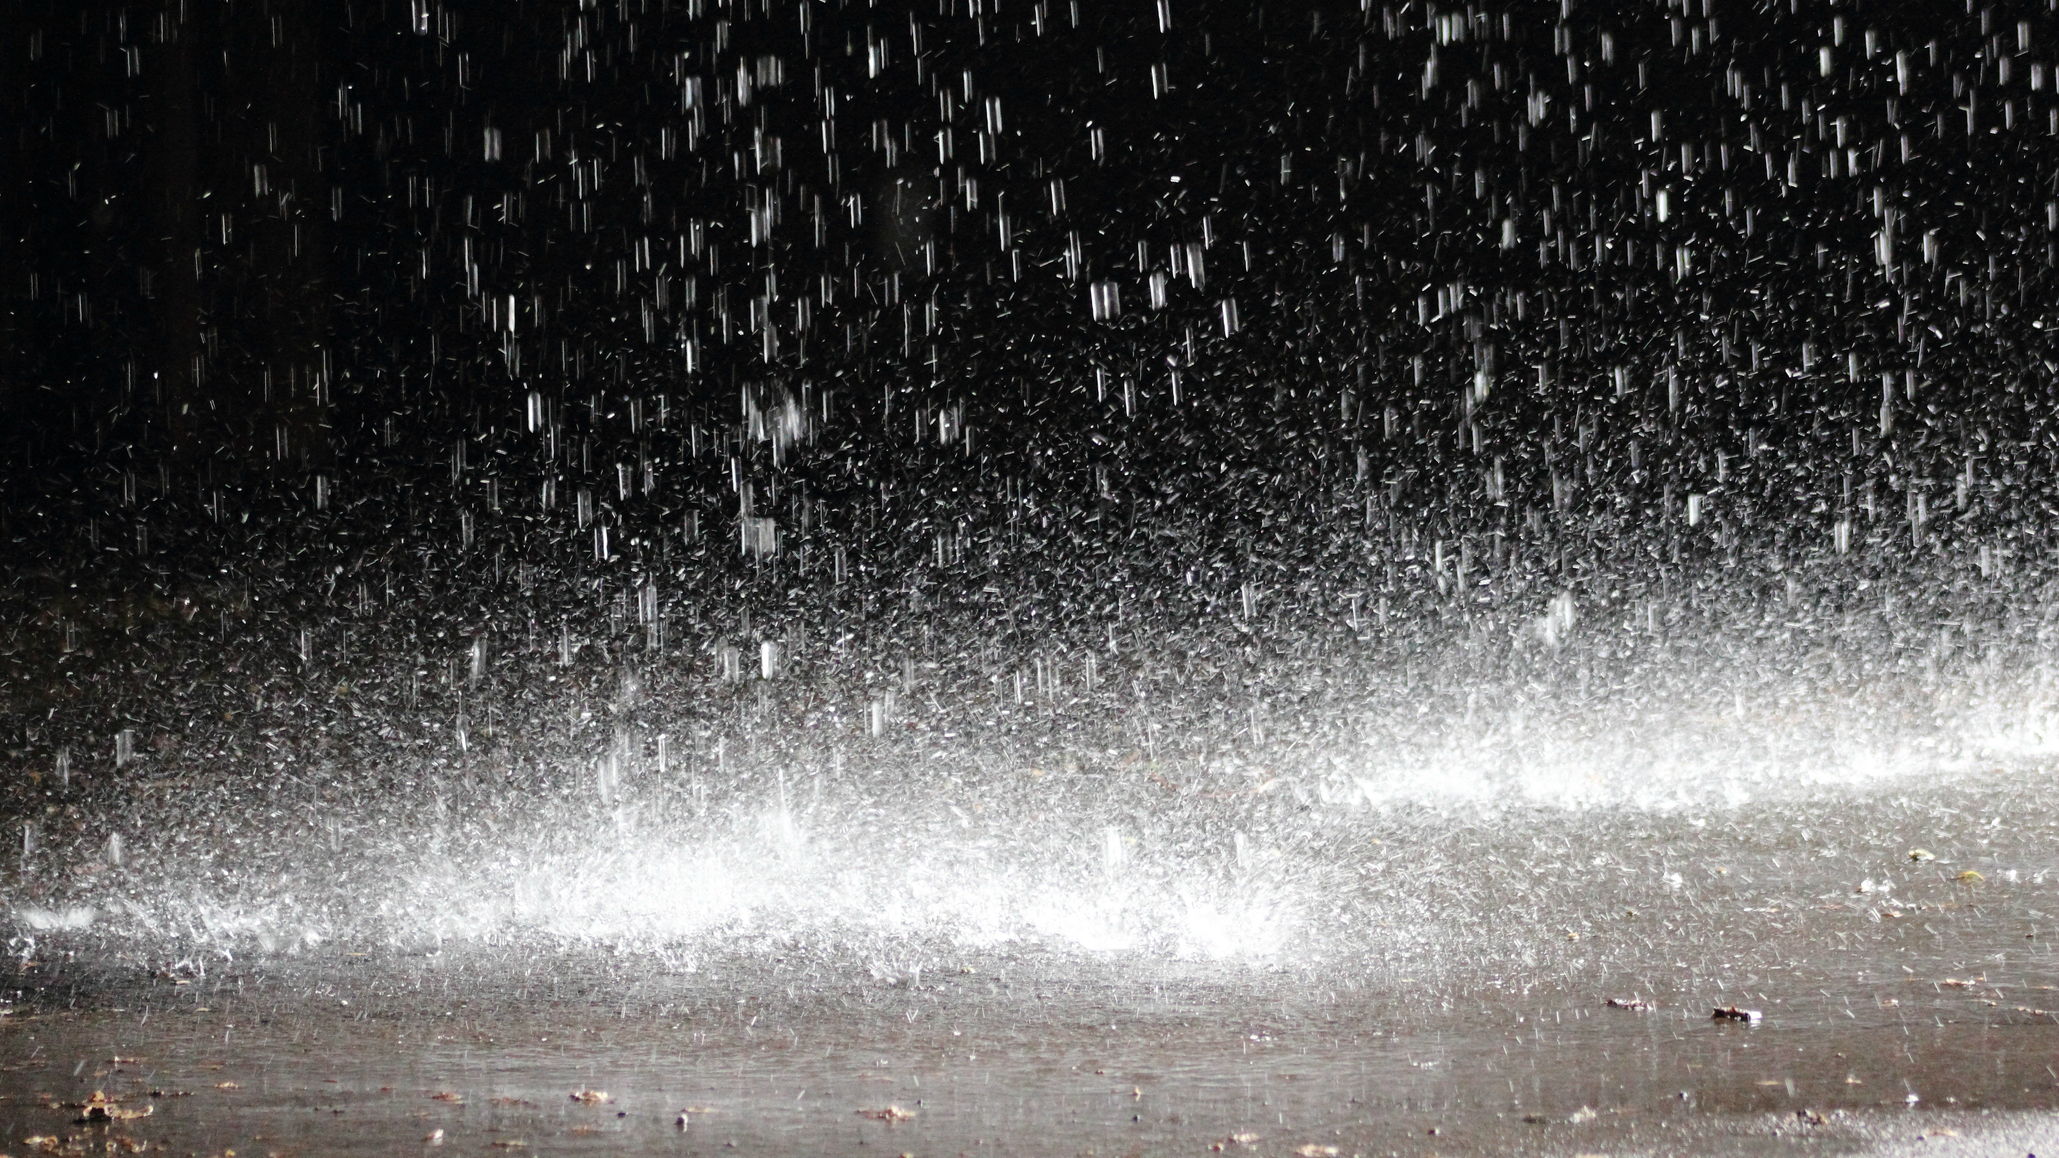

In [118]:
Image.open("/content/drive/MyDrive/weatherdataset/rain/rain100.jpg")

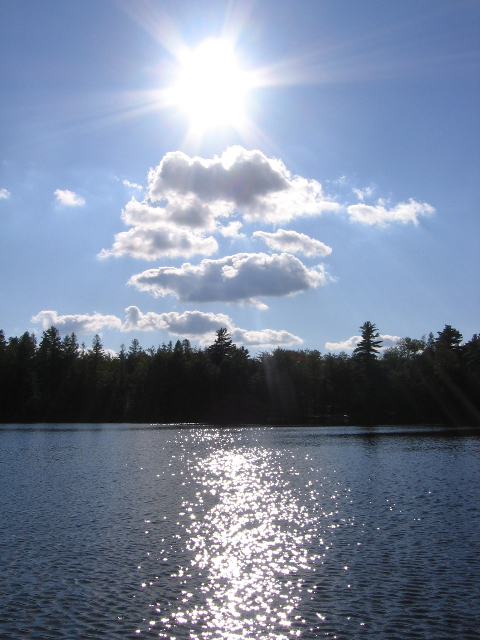

In [119]:
Image.open('/content/drive/MyDrive/weatherdataset/shine/shine100.jpg')

In [120]:
rain_data = os.listdir('/content/drive/MyDrive/weatherdataset/rain')
shine_data = os.listdir('/content/drive/MyDrive/weatherdataset/shine')

from sklearn.model_selection import train_test_split
train_rain, test_rain = train_test_split(cloudy_data, test_size=0.2, random_state=1)
train_shine, test_shine = train_test_split(shine_data, test_size=0.2, random_state=1)

print(test_shine)
Image.open('/content/drive/MyDrive/weatherdataset/shine/shine100.jpg')

# ruh roh raggy it seems we may not be as binary as we thot
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test,y_test)

['shine214.jpg', 'shine10.jpg', 'shine191.jpg', 'shine251.jpg', 'shine95.jpg', 'shine98.jpg', 'shine176.jpg', 'shine157.jpg', 'shine122.jpg', 'shine96.jpg', 'shine127.jpg', 'shine92.jpg', 'shine51.jpg', 'shine136.jpg', 'shine73.jpg', 'shine43.jpg', 'shine28.jpg', 'shine22.jpg', 'shine2.jpg', 'shine217.jpg', 'shine225.jpg', 'shine34.jpg', 'shine143.jpg', 'shine123.jpg', 'shine210.jpg', 'shine250.jpg', 'shine11.jpg', 'shine221.jpg', 'shine3.jpg', 'shine65.jpg', 'shine223.jpg', 'shine115.jpg', 'shine188.jpg', 'shine152.jpg', 'shine140.jpg', 'shine245.jpg', 'shine35.jpg', 'shine30.jpg', 'shine106.jpg', 'shine240.jpg', 'shine204.jpg', 'shine24.jpg', 'shine49.jpg', 'shine194.jpg', 'shine20.jpg', 'shine242.jpg', 'shine116.jpg', 'shine105.jpg', 'shine112.jpg', 'shine215.jpg', 'shine131.jpg']


NameError: ignored